C:\Users\SNUH\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


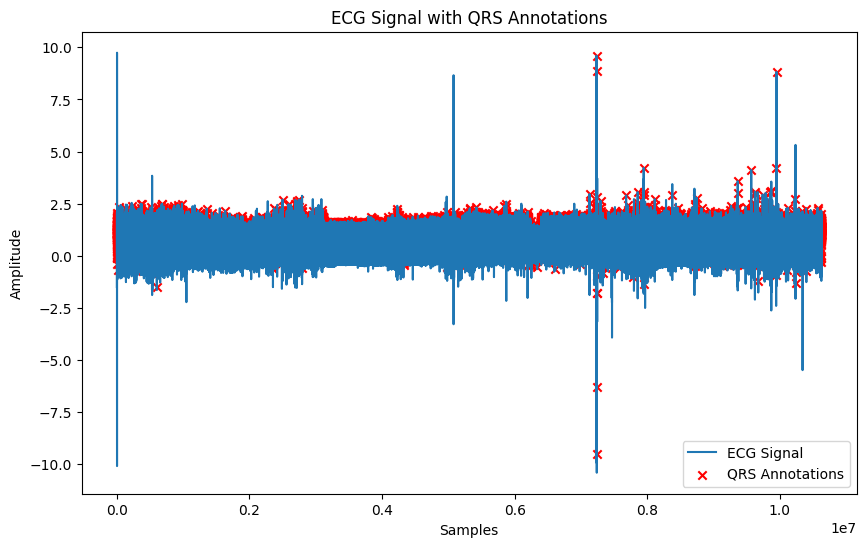

In [3]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로 설정 (확장자를 제외한 파일 이름만 지정)
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'  # 'p1' 파일 이름만 입력 (확장자 제외)

# 신호 데이터 읽기
record = wfdb.rdrecord(file_path)
# 주석 데이터 읽기
annotation = wfdb.rdann(file_path, 'ann')

# 신호 데이터의 길이 가져오기
signal_length = len(record.p_signal)

# 주석 샘플이 신호 데이터의 범위를 초과하지 않도록 필터링
valid_indices = annotation.sample < signal_length
filtered_samples = annotation.sample[valid_indices].astype(np.int32)  # Cast to int32
filtered_symbols = [symbol for i, symbol in enumerate(annotation.symbol) if valid_indices[i]]

# 신호 시각화 (첫 번째 채널만 시각화)
plt.figure(figsize=(10, 6))
plt.plot(record.p_signal[:, 0], label='ECG Signal')
plt.scatter(filtered_samples, record.p_signal[filtered_samples, 0], color='red', label='QRS Annotations', marker='x')
plt.title('ECG Signal with QRS Annotations')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


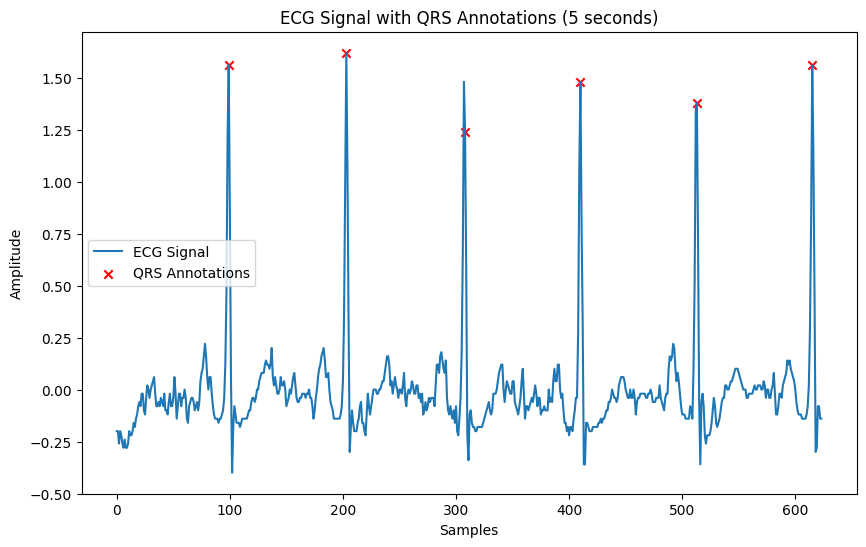

In [4]:
import wfdb
import matplotlib.pyplot as plt

# 파일 경로 설정 (확장자를 제외한 파일 이름만 지정)
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'   # 'p1' 파일 이름만 입력 (확장자 제외)

# 신호 데이터 읽기
record = wfdb.rdrecord(file_path)
# 주석 데이터 읽기
annotation = wfdb.rdann(file_path, 'ann')

# 신호 데이터의 길이 가져오기
signal_length = len(record.p_signal)
# 샘플링 속도 가져오기
fs = record.fs

# 5초에 해당하는 샘플 수 계산
samples_in_5_sec = int(5 * fs)

# 신호의 중간 지점 계산
mid_point = signal_length // 2

# 중간 지점을 기준으로 5초 구간 설정
start_sample = max(0, mid_point - samples_in_5_sec // 2)
end_sample = min(signal_length, mid_point + samples_in_5_sec // 2)

# 해당 구간의 신호와 주석 데이터 필터링
filtered_signal = record.p_signal[start_sample:end_sample, 0]
filtered_samples = annotation.sample[(annotation.sample >= start_sample) & (annotation.sample < end_sample)] - start_sample
filtered_symbols = [annotation.symbol[i] for i in range(len(annotation.sample)) if start_sample <= annotation.sample[i] < end_sample]

# 신호 시각화 (30초 구간, 첫 번째 채널만 시각화)
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal, label='ECG Signal')
plt.scatter(filtered_samples, filtered_signal[filtered_samples], color='red', label='QRS Annotations', marker='x')
plt.title('ECG Signal with QRS Annotations (5 seconds)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [5]:
# Let's inspect the contents of the annotation file to understand its structure and data.
import wfdb

# File path for the annotation file
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'   # Base file name without extension

# Read the annotation file
annotation = wfdb.rdann(file_path, 'ann')

# Convert the annotation to a dictionary for easy inspection
annotation_dict = {
    'Sample': annotation.sample,
    'Symbol': annotation.symbol,
    'Sub Type': annotation.subtype,
    'Chan': annotation.chan,
    'Num': annotation.num,
    'Aux Note': annotation.aux_note
}

annotation_dict


{'Sample': array([      27,       59,       61, ..., 10626842, 10626904, 10626966],
       dtype=int64),
 'Symbol': ['N',
  '|',
  '~',
  '~',
  'N',
  '~',
  '~',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  '|',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'S',
  '~',
  '~',
  'N',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'S',
  '|',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'N',
  'N',
  'S',
  'N',
  'N',
  'S',
  'N',
  '~',
  '~',
  'N',
  '

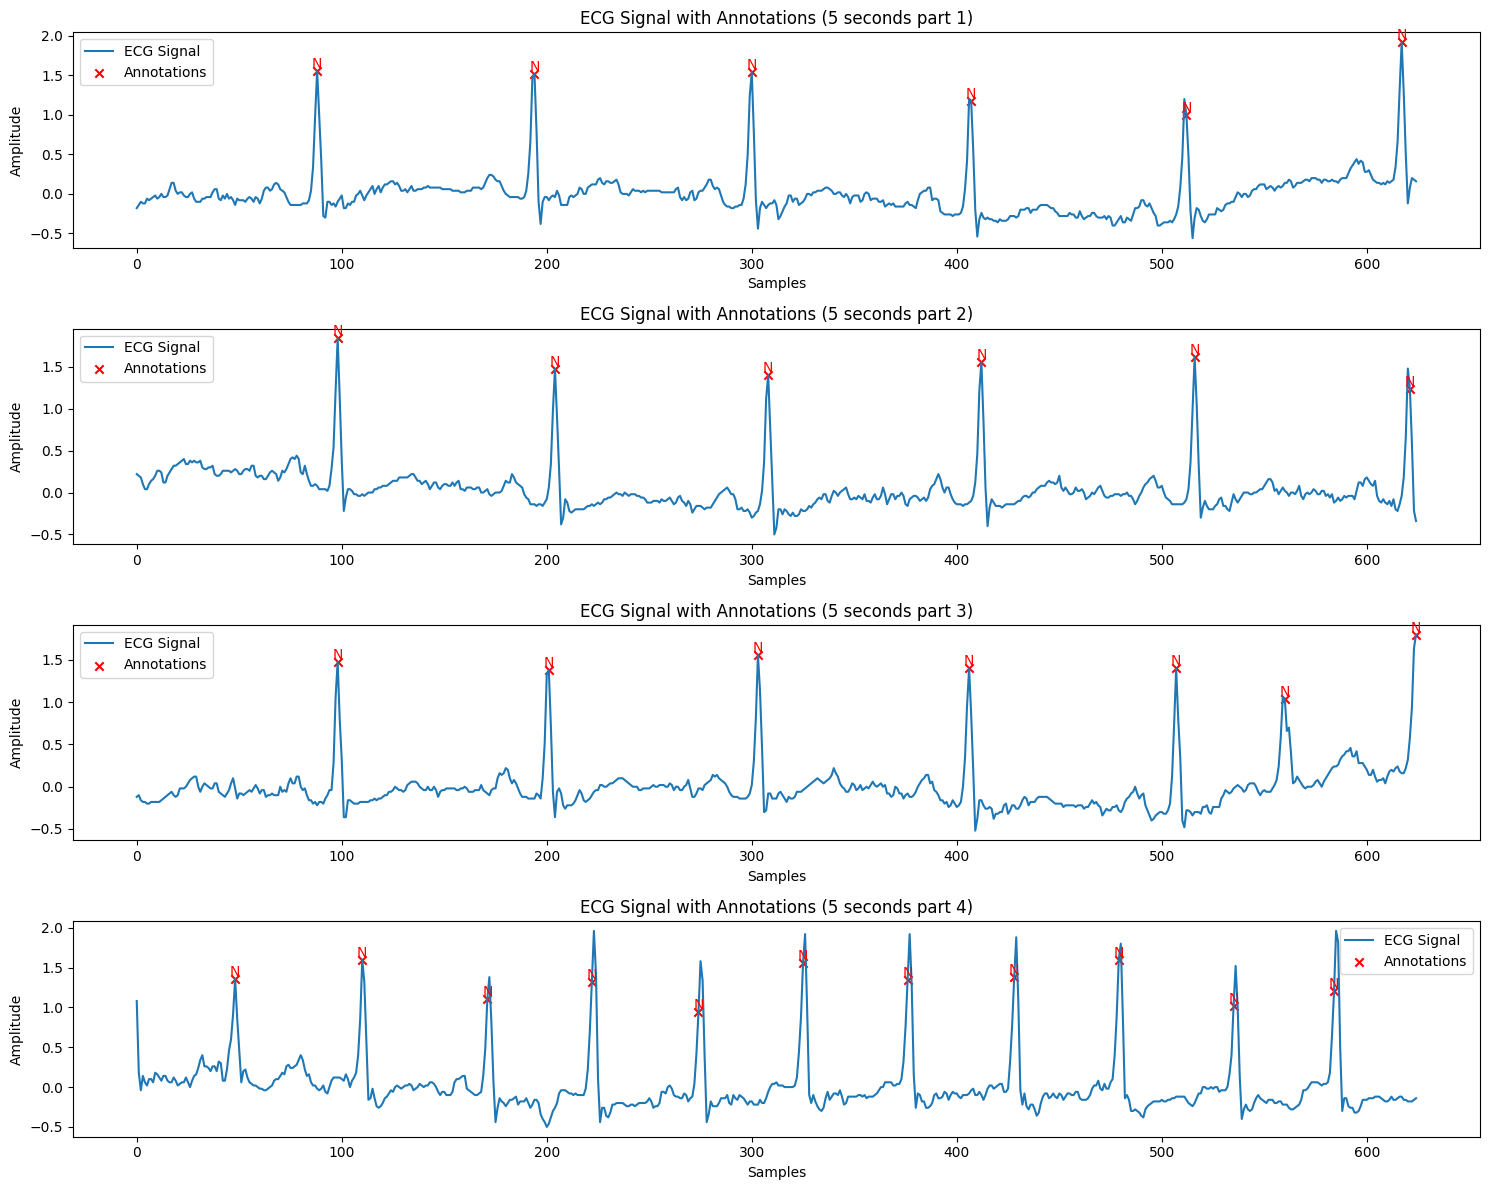

In [6]:
import wfdb
import matplotlib.pyplot as plt

# 파일 경로 설정 (확장자를 제외한 파일 이름만 지정)
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'   # 'p1' 파일 이름만 입력 (확장자 제외)

# 신호 데이터 읽기
record = wfdb.rdrecord(file_path)
# 주석 데이터 읽기
annotation = wfdb.rdann(file_path, 'ann')

# 신호 데이터의 길이 가져오기
signal_length = len(record.p_signal)
# 샘플링 속도 가져오기
fs = record.fs

# 5초에 해당하는 샘플 수 계산
samples_in_5_sec = int(5 * fs)

# 신호의 중간 지점 계산
mid_point = signal_length // 2

# 4개의 5초 구간 설정
start_samples = [mid_point - 2 * samples_in_5_sec + i * samples_in_5_sec for i in range(4)]
end_samples = [start + samples_in_5_sec for start in start_samples]

# 4개의 그래프를 그리기 위한 설정
plt.figure(figsize=(15, 12))

for i, (start_sample, end_sample) in enumerate(zip(start_samples, end_samples)):
    # 해당 구간의 신호와 주석 데이터 필터링
    filtered_signal = record.p_signal[start_sample:end_sample, 0]
    filtered_samples = annotation.sample[(annotation.sample >= start_sample) & (annotation.sample < end_sample)] - start_sample
    filtered_symbols = [annotation.symbol[j] for j in range(len(annotation.sample)) if start_sample <= annotation.sample[j] < end_sample]

    # 신호 시각화 (5초 구간, 첫 번째 채널만 시각화)
    plt.subplot(4, 1, i + 1)
    plt.plot(filtered_signal, label='ECG Signal')
    
    # 주석 심볼 표시
    for sample, symbol in zip(filtered_samples, filtered_symbols):
        plt.text(sample, filtered_signal[sample], symbol, color='red', fontsize=10, ha='center', va='bottom')
    
    # 주석 위치에 심볼 표시
    plt.scatter(filtered_samples, filtered_signal[filtered_samples], color='red', label='Annotations', marker='x')
    plt.title(f'ECG Signal with Annotations (5 seconds part {i+1})')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


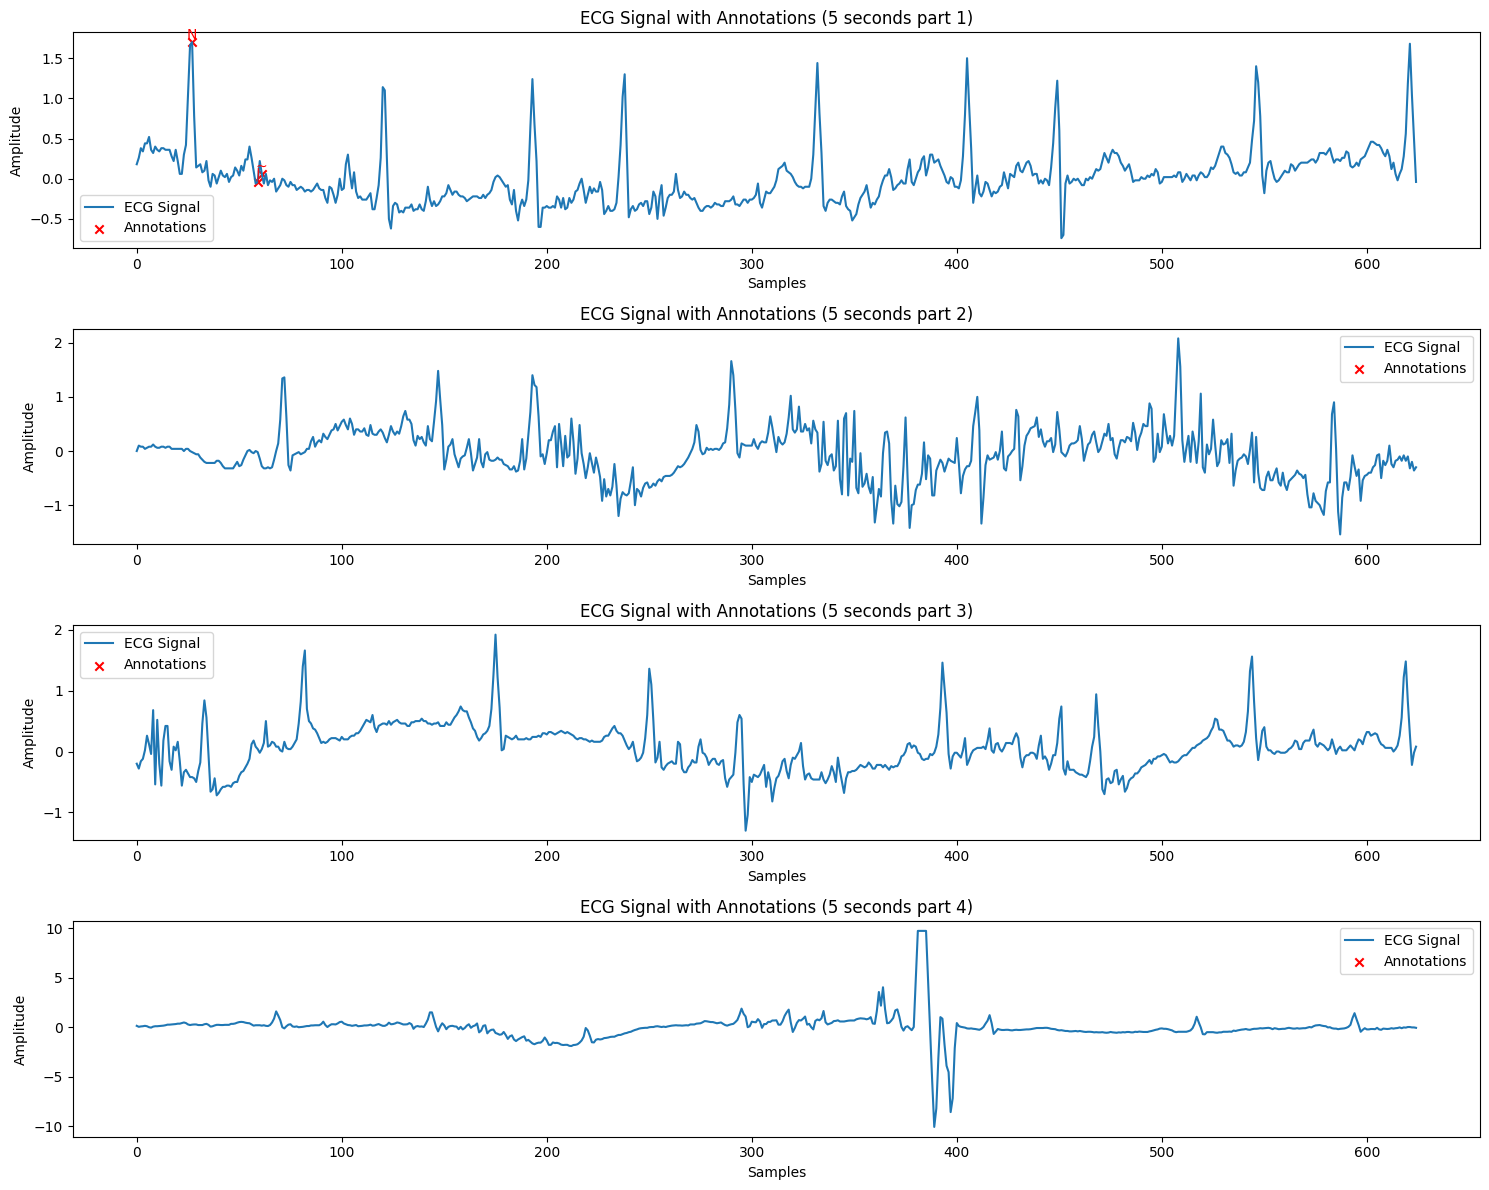

In [7]:
import wfdb
import matplotlib.pyplot as plt

# 파일 경로 설정 (확장자를 제외한 파일 이름만 지정)
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'   # 'p1' 파일 이름만 입력 (확장자 제외)

# 신호 데이터 읽기
record = wfdb.rdrecord(file_path)
# 주석 데이터 읽기
annotation = wfdb.rdann(file_path, 'ann')

# 샘플링 속도 가져오기
fs = record.fs

# 5초에 해당하는 샘플 수 계산
samples_in_5_sec = int(5 * fs)

# 시작부터 4개의 5초 구간 설정
start_samples = [i * samples_in_5_sec for i in range(4)]
end_samples = [start + samples_in_5_sec for start in start_samples]

# 4개의 그래프를 그리기 위한 설정
plt.figure(figsize=(15, 12))

for i, (start_sample, end_sample) in enumerate(zip(start_samples, end_samples)):
    # 해당 구간의 신호와 주석 데이터 필터링
    filtered_signal = record.p_signal[start_sample:end_sample, 0]
    filtered_samples = annotation.sample[(annotation.sample >= start_sample) & (annotation.sample < end_sample)] - start_sample
    filtered_symbols = [annotation.symbol[j] for j in range(len(annotation.sample)) if start_sample <= annotation.sample[j] < end_sample]

    # 신호 시각화 (5초 구간, 첫 번째 채널만 시각화)
    plt.subplot(4, 1, i + 1)
    plt.plot(filtered_signal, label='ECG Signal')
    
    # 주석 심볼 표시
    for sample, symbol in zip(filtered_samples, filtered_symbols):
        plt.text(sample, filtered_signal[sample], symbol, color='red', fontsize=10, ha='center', va='bottom')
    
    # 주석 위치에 심볼 표시
    plt.scatter(filtered_samples, filtered_signal[filtered_samples], color='red', label='Annotations', marker='x')
    plt.title(f'ECG Signal with Annotations (5 seconds part {i+1})')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


In [8]:
filtered_symbols

[]

In [9]:
import wfdb
import matplotlib.pyplot as plt

# 파일 경로 설정 (확장자를 제외한 파일 이름만 지정)
file_path = r'C:\Users\SNUH\Desktop\adult_sample\adult_sample2'  # 'p1' 파일 이름만 입력 (확장자 제외)

# 신호 데이터 읽기
record = wfdb.rdrecord(file_path)
# 주석 데이터 읽기
annotation = wfdb.rdann(file_path, 'ann')

# 샘플링 속도 가져오기
fs = record.fs

# 'v' 또는 's'가 포함된 심볼을 가진 주석 필터링
filtered_indices = [i for i, symbol in enumerate(annotation.symbol) if 'v' in symbol.lower() or 's' in symbol.lower()]

# 필터링된 주석에 해당하는 샘플 위치 가져오기
filtered_samples = annotation.sample[filtered_indices]
filtered_symbols = [annotation.symbol[i] for i in filtered_indices]

# 플롯을 위해 각 구간 주변의 신호를 일정 구간만큼 표시 (예: 5초)
plot_duration_sec = 5
samples_in_plot_duration = int(plot_duration_sec * fs)

# 각 심볼에 해당하는 구간을 플롯
plt.figure(figsize=(15, len(filtered_samples) * 4))

for i, sample in enumerate(filtered_samples):
    start_sample = max(0, sample - samples_in_plot_duration // 2)
    end_sample = min(len(record.p_signal), sample + samples_in_plot_duration // 2)
    
    # 해당 구간의 신호와 주석 데이터 필터링
    segment_signal = record.p_signal[start_sample:end_sample, 0]
    segment_samples = annotation.sample[(annotation.sample >= start_sample) & (annotation.sample < end_sample)] - start_sample
    segment_symbols = [annotation.symbol[j] for j in range(len(annotation.sample)) if start_sample <= annotation.sample[j] < end_sample]

    # 신호 시각화 (서브플롯으로 표시)
    plt.subplot(len(filtered_samples), 1, i + 1)
    plt.plot(segment_signal, label='ECG Signal')
    
    # 주석 심볼 표시
    for seg_sample, seg_symbol in zip(segment_samples, segment_symbols):
        plt.text(seg_sample, segment_signal[seg_sample], seg_symbol, color='red', fontsize=10, ha='center', va='bottom')
    
    # 주석 위치에 심볼 표시
    plt.scatter(segment_samples, segment_signal[segment_samples], color='red', label='Annotations', marker='x')
    plt.title(f'ECG Segment with Annotations around {filtered_symbols[i]}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000027755E95E40> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x5649600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x5649600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x5.6496e+06 with 6867 Axes>